# Big Data Analysis 1
### Exercise: Pandas in Jupyter

#### Step 1: remove unneeded rows and calculate all rows and 'timeout'rows 

In [16]:
## 1. Copy google_ping.txt file to file temp.txt
## 2. Strip first (1) row from the file temp.txt
## 3. Strip 4 last rows from the file temp.txt

## Your code here
!cp google_ping.txt temp.txt
!sed -i '1d' temp.txt
!sed -i "$(( $(wc -l <temp.txt)-3 )),$ d" temp.txt

In [19]:
## 1. Print file temp.txt to see if it looks as it should (below you can see 7 first rows in correct format) 

## Your code here
!head -7 temp.txt

64 bytes from 74.125.205.138: icmp_seq=0 ttl=106 time=22.476 ms
64 bytes from 74.125.205.138: icmp_seq=1 ttl=106 time=24.295 ms
64 bytes from 74.125.205.138: icmp_seq=2 ttl=106 time=89.301 ms
Request timeout for icmp_seq 3
64 bytes from 74.125.205.138: icmp_seq=3 ttl=106 time=149.829 ms
64 bytes from 74.125.205.138: icmp_seq=4 ttl=106 time=66.600 ms
64 bytes from 74.125.205.138: icmp_seq=5 ttl=106 time=143.979 ms


In [84]:
## 1. calculate all rows in the file 'temp.txt' and save the result as variable 'ping_count' 
## 2. calculate rows with text 'timeout' in the file 'temp.txt' and save the result  as variable 'timeout_count'

ping_count = !wc -l < temp.txt
timeout_count = !grep -w -c timeout temp.txt

# You might need to change data types   
ping_count = int(ping_count[0])
print(ping_count)
timeout_count = int(timeout_count[0])
print(timeout_count)

95
0


#### Step 2: replace 'timeout'rows with text `NaN` and leave only ping times to other rows (e.g. 22.476). I.e. remove all other texts in the rows. 

**hint1.** In this cell you need only `sed` command 

**hint2.** Try first command `!sed -i -e 's/[0-9]\{1,3\}\.[0-9]\{1,3\}\.[0-9]\{1,3\}\.[0-9]\{1,3\}//g' temp.txt` and investigate it's results by printing file `temp.txt`

In [52]:
## 1. replace rows with 'timeout' with text 'NaN'  
## 2. leave only ping times to other rows (e.g. 22.476). I.e. remove all other texts in the rows.

## Your code here
!sed -i -e 's/[0-9]\{1,3\}\.[0-9]\{1,3\}\.[0-9]\{1,3\}\.[0-9]\{1,3\}//g' temp.txt
!sed -i -e 's/Request timeout for icmp_seq 3/NaN/g' temp.txt
!sed -i -e 's/ ms//g' temp.txt
!sed -i -e 's/64 bytes from : icmp_seq=//g' temp.txt
!sed -i -e 's/ttl=106 time=//g' temp.txt
!sed -i -e 's/[0-9]\{2\} //g' temp.txt

In [53]:
## 1. Print file temp.txt to see if it looks as it should (below you can see 7 first rows in correct format)

## Your code here
!head -7 temp.txt

22.476
24.295
89.301
NaN
149.829
66.600
143.979


#### Step 3: Read 'temp.txt' to Jupyter  

In [70]:
## You can use following code rows to read the ping data from the file.
# 1. ping_data = !cat temp.txt
# 2. import numpy as np
# 3. ping_list = list(np.float_(ping_data))

## Your code here
ping_data = !cat temp.txt
import numpy as np
ping_list = list(np.float_(ping_data))

#### Step 4: Make Pandas dataframe from the 'ping_list' and investigate it by using pandas describe methods and plotting it.    

In [68]:
## 1. import pandas 
## 2. Make Pandas dataframe 'ping_df' from the 'ping_list' 
## 3. Calculate NaN values (= timeout rows) in 'ping_df'
## 4. Print first 10 rows if 'ping_df'

## Your code here
import pandas as pd

ping_df = pd.DataFrame(ping_list)
print('ping_df NaN count is:', ping_df.isnull().sum().sum())
ping_df.head(10)

ping_df NaN count is: 1


,0
0,22.476
1,24.295
2,89.301
3,NaN
4,149.829
5,66.600
6,143.979
7,40.057
8,120.769
9,25.637


In [69]:
## 1. Investigate 'ping_df' statistics with pandas 'describe' function

## Your code here
ping_df.describe()

,0
count,94.000000
mean,44.663734
std,40.234384
min,21.390000
25%,23.411750
50%,24.754500
75%,37.386000
max,153.979000


<AxesSubplot:>

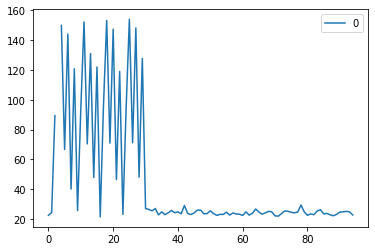

In [72]:
## 1. Use matplotlib inline to plot 'ping_df' data

## Your code here
%matplotlib inline

ping_df.plot()

You should get something like this:

<img src="./bda1_pandas_answers/plot.png" width=400px>

### Check your answers by running following cell:

In [85]:
# Do not change this code!

import importlib
import bda1_pandas_check
importlib.reload(bda1_pandas_check)

print("Results:")
correct = bda1_pandas_check.check_ping(ping_count, timeout_count, ping_df)
print("Correct answers", correct, "/ 3.")


Results:
2. 'timeout_count' is not correct. Please check your answer.
Correct answers 2 / 3.


### Nice work! 

It is easy to use Pandas. Isn't it? :)